<h1><center> Fundamental Concept of ML modeling </center> </h1>


- Objectives for this tutorial:

    - Understand key concept Data profiling 
    - Data Visualization
    - Data Preprocessing
    - Feature Engineering 
    - **Feature Extraction** 
    - Model development 
    - **Model deployment**
    
- Develop complete pipeline:

    - The use sklearn library.
    - **Flask API** 
    
- [Zindi datasets](https://zindi.africa/competitions/income-prediction-challenge-for-azubian) 

#### Data loading and profiling:

- For any ML development, one has to first understand the datasets and key features in the data. 
    - Check the size of the datasets 
    - Data type of the each features in the datasets. 
    - Number of missing information in the datasets. 
    - Number of features. 
    - Target feature in the datasets. 

In [1]:
###### import necessary libraries: 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer
from sklearn.metrics import classification_report, accuracy_score, RocCurveDisplay, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
##### load the datasets using the pandas 
datasets = pd.read_csv("Train.csv")
datasets.head(4)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit


In [3]:
datasets.tail(4)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit
209498,ID_TZ99999,19,Male,11th grade,Local government,High school,Never married,Black,All other,Children or Armed Forces,...,US,MSA to MSA,Same,Same county,Same county,No,South,Florida,1987.72,Below limit


## Data Profiling:

#### check the shape of the datasets: 

In [3]:
print("Number of rows: \n",datasets.shape[0],)
print()
print("Number of columns: \n",datasets.shape[1])

Number of rows: 
 209499

Number of columns: 
 43


#### check for data types for each features: 

In [4]:
##### column names 
datasets.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [4]:
##### check the data type info:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [5]:
##### check for missing values: 
datasets.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

### Visualize the percentage of missing information

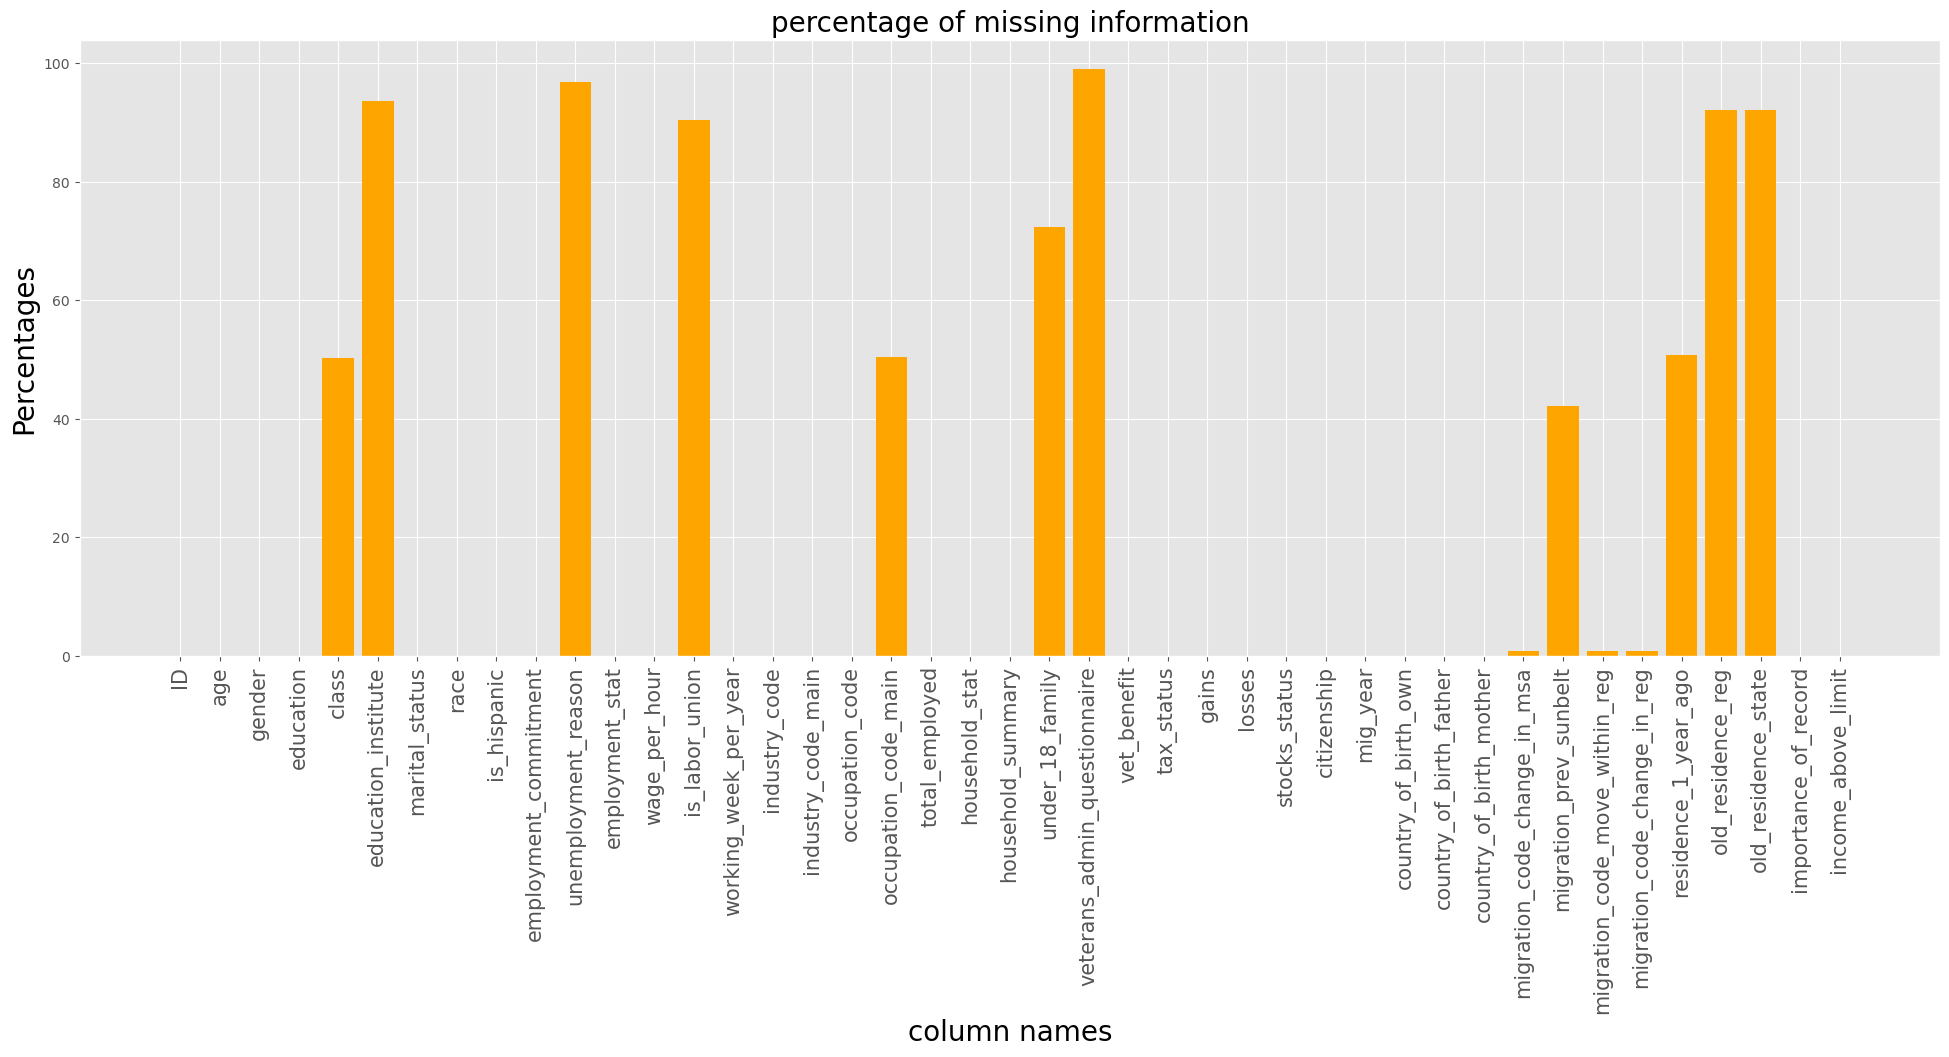

In [45]:
#### compute the percentage of missing information 
column_names = datasets.isnull().sum().index
percentage_of_missinginfo = datasets.isnull().sum().values/datasets.shape[0] * 100

from matplotlib import pyplot as plt 

with plt.style.context("ggplot"):
    
    plt.figure(figsize=(24,8))
    
    plt.bar(np.arange(len(column_names)),percentage_of_missinginfo,color="orange")
    plt.xticks(np.arange(len(column_names)),column_names,rotation=90,fontsize=15)
    plt.xlabel("column names",fontsize=20)
    plt.ylabel("Percentages",fontsize=20)
    plt.title("percentage of missing information",fontsize=20)
    plt.show()

In [30]:
datasets.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [35]:
##### column with 
columns_to_remove = []
for column in datasets.columns:
    
    rate_missing_info = datasets[column].isnull().sum()/datasets.shape[0] * 100
    
    if rate_missing_info > 40:
        columns_to_remove.append(column)

print("Column with more 40% missing info: \n",columns_to_remove)

Column with more 40% missing info: 
 ['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [37]:
##### remove columns with a lot missing information: 
datasets = datasets.drop(columns=columns_to_remove,axis=1)

In [38]:
datasets.columns

Index(['ID', 'age', 'gender', 'education', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'total_employed',
       'household_stat', 'household_summary', 'vet_benefit', 'tax_status',
       'gains', 'losses', 'stocks_status', 'citizenship', 'mig_year',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_code_move_within_reg', 'migration_code_change_in_reg',
       'importance_of_record', 'income_above_limit'],
      dtype='object')

In [39]:
datasets.isnull().sum()

ID                                   0
age                                  0
gender                               0
education                            0
marital_status                       0
race                                 0
is_hispanic                          0
employment_commitment                0
employment_stat                      0
wage_per_hour                        0
working_week_per_year                0
industry_code                        0
industry_code_main                   0
occupation_code                      0
total_employed                       0
household_stat                       0
household_summary                    0
vet_benefit                          0
tax_status                           0
gains                                0
losses                               0
stocks_status                        0
citizenship                          0
mig_year                             0
country_of_birth_own                 0
country_of_birth_father  

In [48]:
##### check the number of categories in the target:
datasets.income_above_limit.value_counts()

Below limit    196501
Above limit     12998
Name: income_above_limit, dtype: int64

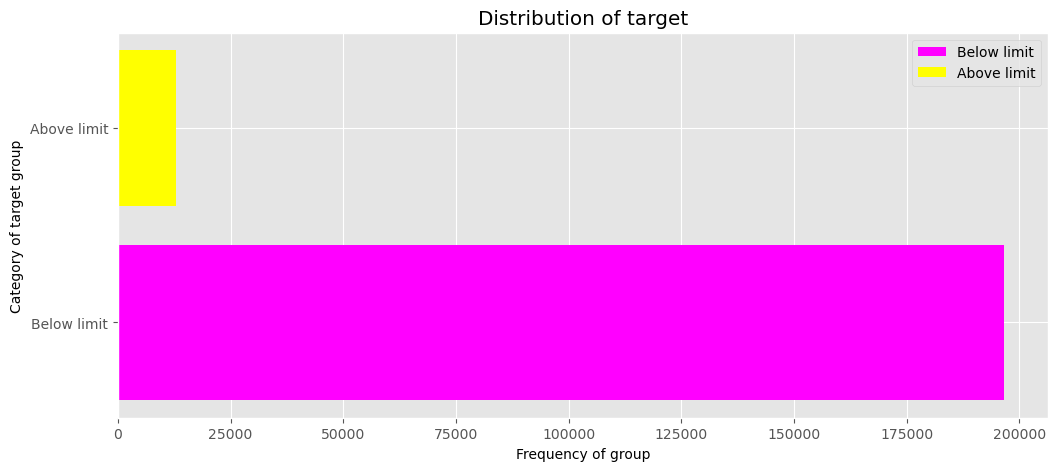

In [54]:
###### check for target distribution 
nums_category = datasets.income_above_limit.value_counts().values 
category = datasets.income_above_limit.value_counts().index

with plt.style.context("ggplot"):
    
    plt.figure(figsize=(12,5))
    
    plt.barh(np.arange(len(category)), nums_category,label=category,color=["magenta","yellow"])
    plt.yticks(np.arange(len(category)),category)
    plt.title("Distribution of target")
    plt.ylabel("Category of target group")
    plt.xlabel("Frequency of group")
    plt.legend(loc="best")
    plt.show()

In [59]:
###### check average age of target distribution 
datasets[["age","income_above_limit"]].groupby("income_above_limit").mean().round()

######## Task : Plot these values. 

,age
income_above_limit,
Above limit,46.0
Below limit,34.0


In [69]:
datasets.total_employed.value_counts()

0    100688
6     38461
1     24357
4     14969
3     14138
2     10683
5      6203
Name: total_employed, dtype: int64

In [78]:
datasets[["total_employed","income_above_limit"]].groupby("income_above_limit")

,total_employed
income_above_limit,
Above limit,4.024388
Below limit,1.819253


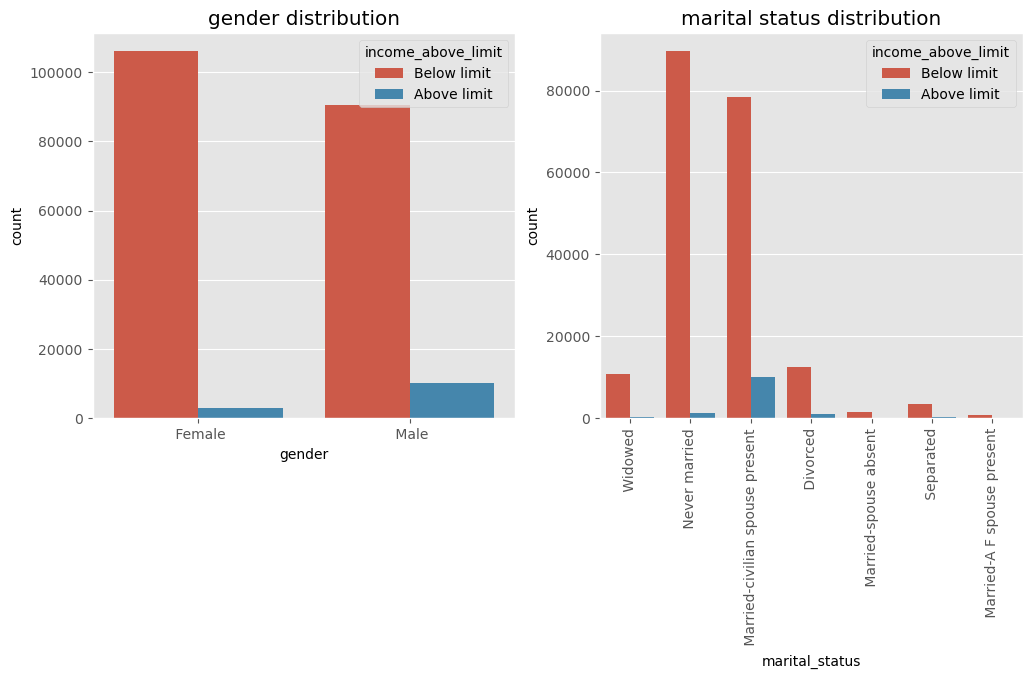

In [16]:
with plt.style.context("ggplot"):
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.countplot(x="gender",hue="income_above_limit",data=datasets)
    plt.title("gender distribution")
    
    plt.subplot(1,2,2)
    sns.countplot(x="marital_status",hue="income_above_limit",data=datasets)
    plt.title("marital status distribution")
    plt.xticks(rotation=90)
    plt.show()

### Data Preprocessing pipeline

- At this stage, we would perform data preprocessing. 

In [106]:
#### split the datasets into two part: 

trainsets, validation = train_test_split(datasets,test_size=0.15,random_state=2023)

In [107]:
print("shape of trainset: ", trainsets.shape)
print()
print("shape of validset: ", validation.shape)

shape of trainset:  (178074, 32)

shape of validset:  (31425, 32)


In [108]:
##### extract object columns in the dataframe: 
object_columns = trainsets.select_dtypes(include=['object']).columns.to_list()

print("check for object columns: \n",object_columns)

check for object columns: 
 ['ID', 'gender', 'education', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'industry_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'income_above_limit']


In [109]:
### check for unique elements in the dataframe: 

uniqueElements = {}

for column in object_columns:
    
    uniqueElements[column] = trainsets[column].nunique()
    
print("number of unique elements in the columns \n \n",uniqueElements)

number of unique elements in the columns 
 
 {'ID': 178074, 'gender': 2, 'education': 17, 'marital_status': 7, 'race': 5, 'is_hispanic': 10, 'employment_commitment': 8, 'industry_code_main': 24, 'household_stat': 38, 'household_summary': 8, 'tax_status': 6, 'citizenship': 5, 'country_of_birth_own': 43, 'country_of_birth_father': 43, 'country_of_birth_mother': 43, 'migration_code_change_in_msa': 9, 'migration_code_move_within_reg': 9, 'migration_code_change_in_reg': 8, 'income_above_limit': 2}


In [110]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
trainsets[trainsets.isnull().any(axis=1)]

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
102658,ID_TZ191583,0,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,1895.59,Below limit
159734,ID_TZ54759,0,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,1970.66,Below limit
53723,ID_TZ147498,0,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,2167.62,Below limit
190399,ID_TZ82636,0,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,1607.63,Below limit
125175,ID_TZ23341,0,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,1407.86,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163673,ID_TZ5834,0,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,953.51,Below limit
69564,ID_TZ161769,0,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,1190.77,Below limit
159496,ID_TZ54542,0,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,1898.59,Below limit
152186,ID_TZ47897,0,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Grandchild <18 never marr child of subfamily RP,Other relative of householder,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,2166.81,Below limit


In [111]:
validation[validation.isnull().any(axis=1)]

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
188770,ID_TZ81155,0,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,Canada,US,NaN,NaN,NaN,2329.91,Below limit
168308,ID_TZ62553,0,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,2109.19,Below limit
27851,ID_TZ12419,0,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Grandchild <18 never marr child of subfamily RP,Other relative of householder,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,5647.25,Below limit
42822,ID_TZ137677,0,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,3663.50,Below limit
121810,ID_TZ208837,0,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,1910.92,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197761,ID_TZ89329,0,Female,Children,Never married,White,Mexican (Mexicano),Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Other Rel <18 never marr child of subfamily RP,Other relative of householder,0,Nonfiler,0,0,0,Native,94,US,Mexico,Mexico,NaN,NaN,NaN,2999.71,Below limit
193089,ID_TZ85081,0,Female,Children,Never married,Black,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,3915.56,Below limit
199340,ID_TZ90764,0,Female,Children,Never married,White,Mexican-American,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,2002.30,Below limit
28871,ID_TZ125108,0,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,US,US,NaN,NaN,NaN,1455.28,Below limit


In [112]:
###### drop missing values from rows 
trainsets = trainsets.dropna(axis=0,how="any")
validation = validation.dropna(axis=0,how="any")

In [113]:
trainsets.isnull().sum()

ID                                0
age                               0
gender                            0
education                         0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father           0
country_of_birth_mother           0
migration_code_change_in_msa

In [114]:
validation.isnull().sum()

ID                                0
age                               0
gender                            0
education                         0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father           0
country_of_birth_mother           0
migration_code_change_in_msa

In [115]:
object_columns = list(uniqueElements.keys())

In [116]:
from sklearn.base import BaseEstimator,TransformerMixin

### create custom categorical converter 
class CategoricalConverter(BaseEstimator,TransformerMixin):
    
    """
    Convert column objects into categorical data type. 
    """
    
    def __init__(self,columns:list= None ):
        self.columns = columns 
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        
        for col in self.columns:
            
            X[col] = X[col].astype("category")
            
        return X 

cateConverter= CategoricalConverter(columns=object_columns)

In [117]:
trainsets = cateConverter.fit(trainsets).transform(trainsets)

In [118]:
validation = cateConverter.transform(validation)

In [119]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31206 entries, 85277 to 23388
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              31206 non-null  category
 1   age                             31206 non-null  int64   
 2   gender                          31206 non-null  category
 3   education                       31206 non-null  category
 4   marital_status                  31206 non-null  category
 5   race                            31206 non-null  category
 6   is_hispanic                     31206 non-null  category
 7   employment_commitment           31206 non-null  category
 8   employment_stat                 31206 non-null  int64   
 9   wage_per_hour                   31206 non-null  int64   
 10  working_week_per_year           31206 non-null  int64   
 11  industry_code                   31206 non-null  int64   
 12  industry_code_

In [120]:
###### columns encode: 
label_encode_features = [column for column in object_columns if column not in ["ID","income_above_limit"]]

In [121]:
label_encode_features

['gender',
 'education',
 'marital_status',
 'race',
 'is_hispanic',
 'employment_commitment',
 'industry_code_main',
 'household_stat',
 'household_summary',
 'tax_status',
 'citizenship',
 'country_of_birth_own',
 'country_of_birth_father',
 'country_of_birth_mother',
 'migration_code_change_in_msa',
 'migration_code_move_within_reg',
 'migration_code_change_in_reg']

In [122]:
trainsets.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
121496,ID_TZ208554,34,Male,Associates degree-occup /vocational,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,37,Business and repair services,33,6,Householder,Householder,2,Joint both under 65,0,0,0,Native,95,US,US,US,?,?,?,3373.00,Below limit
170496,ID_TZ64542,36,Male,11th grade,Married-civilian spouse present,White,Mexican (Mexicano),Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Householder,Householder,2,Nonfiler,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,363.72,Below limit
165893,ID_TZ60358,56,Male,5th or 6th grade,Separated,White,All other,Children or Armed Forces,0,0,52,5,Manufacturing-durable goods,36,6,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,2939.32,Below limit
66674,ID_TZ159165,17,Female,11th grade,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,1878.66,Below limit
209263,ID_TZ99785,39,Female,Bachelors degree(BA AB BS),Divorced,Black,All other,Children or Armed Forces,2,0,52,35,Finance insurance and real estate,3,6,Householder,Householder,2,Head of household,0,0,78,Native,94,US,US,US,unchanged,unchanged,unchanged,2478.30,Below limit


### Feature Engineering 

In [123]:
from sklearn.preprocessing import LabelEncoder

class FeaturesEncoder(TransformerMixin,BaseEstimator):
    
    def __init__(self,columns=None):
        
        self.columns = columns 
        
    def fit(self,X,y=None):
        
        self.storeFeatures = {}
        
        for column in self.columns:
            label = LabelEncoder()
            
            self.storeFeatures[column] = label.fit(X[column])
            
        return self
            
    def transform(self,X,y=None):
        
        for column in self.columns:
            
            X[column] = self.storeFeatures[column].transform(X[column])
            
        return X 

In [124]:
labelencoder = FeaturesEncoder(columns = label_encode_features)
labelencoder.fit(X=trainsets)

FeaturesEncoder(columns=['gender', 'education', 'marital_status', 'race',
                         'is_hispanic', 'employment_commitment',
                         'industry_code_main', 'household_stat',
                         'household_summary', 'tax_status', 'citizenship',
                         'country_of_birth_own', 'country_of_birth_father',
                         'country_of_birth_mother',
                         'migration_code_change_in_msa',
                         'migration_code_move_within_reg',
                         'migration_code_change_in_reg'])

In [125]:
trainsets_encode = labelencoder.transform(trainsets)
validation_encode = labelencoder.transform(validation)

In [126]:
trainsets_encode.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
121496,ID_TZ208554,34,1,8,2,4,0,1,0,0,52,37,2,33,6,20,4,2,2,0,0,0,4,95,42,42,42,0,0,0,3373.00,Below limit
170496,ID_TZ64542,36,1,1,2,4,5,0,0,0,0,0,14,0,0,20,4,2,4,0,0,0,4,94,42,42,42,8,8,7,363.72,Below limit
165893,ID_TZ60358,56,1,4,5,4,0,0,0,0,52,5,10,36,6,22,4,2,5,0,0,0,4,94,42,42,42,8,8,7,2939.32,Below limit
66674,ID_TZ159165,17,0,1,4,4,0,0,0,0,0,0,14,0,0,8,2,2,4,0,0,0,4,94,42,42,42,8,8,7,1878.66,Below limit
209263,ID_TZ99785,39,0,9,0,2,0,0,2,0,52,35,7,3,6,20,4,2,0,0,0,78,4,94,42,42,42,8,8,7,2478.30,Below limit


In [127]:
validation_encode.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
85277,ID_TZ175924,69,0,12,0,4,0,2,0,0,0,0,14,0,0,22,4,2,5,0,0,0,4,95,42,42,42,0,0,0,1430.36,Below limit
5971,ID_TZ104478,13,0,10,4,4,0,0,0,0,0,0,14,0,0,8,2,0,4,0,0,0,4,95,42,42,42,0,0,0,2729.55,Below limit
161408,ID_TZ56280,52,0,12,2,4,0,0,0,0,52,45,15,23,2,37,7,2,2,0,0,200,4,94,42,42,42,8,8,7,1748.74,Below limit
49843,ID_TZ144001,18,1,16,4,4,6,6,0,0,12,11,10,31,4,2,0,2,5,0,0,0,4,95,42,26,26,0,0,0,2091.55,Below limit
27423,ID_TZ123803,21,0,12,4,4,0,2,0,0,2,33,19,41,1,3,0,2,4,0,0,0,4,95,42,42,42,0,0,0,394.79,Below limit


In [128]:
y_train = trainsets_encode["income_above_limit"]
y_valid = validation_encode["income_above_limit"]

#### extract the X features 
X_train = trainsets_encode.drop(columns=["ID","income_above_limit"],axis=1)
X_valid = validation_encode.drop(columns=["ID","income_above_limit"],axis=1)

In [129]:
#### standardized the datasets: 
scaler = StandardScaler()
scaler.fit(X_train)

##### transform features: 
X_train_transform = scaler.transform(X_train)
X_valid_transform = scaler.transform(X_valid)

### Model Development 

In [130]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(X_train_transform,y_train)

LogisticRegression()

In [134]:
print("Accuracy of the logistic model: \n",accuracy_score(logistic.predict(X_valid_transform),y_valid))

Accuracy of the logistic model: 
 0.9467730564635006


In [137]:
print(classification_report(logistic.predict(X_valid_transform),y_valid))

              precision    recall  f1-score   support

 Above limit       0.27      0.69      0.39       773
 Below limit       0.99      0.95      0.97     30433

    accuracy                           0.95     31206
   macro avg       0.63      0.82      0.68     31206
weighted avg       0.97      0.95      0.96     31206



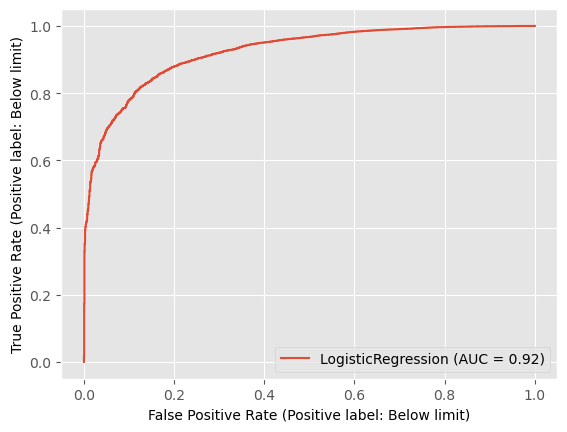

In [142]:
with plt.style.context("ggplot"):
    
    RocCurveDisplay.from_estimator(logistic,X_valid_transform,y_valid)
    plt.show()

#### Pipeline Development process: